In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#style.use('fivethirtyeight')
sns.set(style='whitegrid')
#sns.set(style='fivethirtyeight')

In [3]:
#read the dataset and check the first five rows
loan = pd.read_csv("loan.csv", encoding='UTF-8',low_memory=False)

In [4]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


**#DATA CLEANING**

In [6]:
missing=round(100*(loan.isnull().sum()/len(loan['id'])),2)

In [7]:
missing_column=list(missing[missing>50].index)

In [8]:
len(missing_column)

57

In [9]:
loan=loan.drop(missing_column,axis=1)

In [10]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [11]:
missing_2=round(100*(loan.isnull().sum()/len(loan['id'])),2)

In [12]:
missing_2=missing_2[missing_2>0]

In [13]:
missing_2

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
revol_util                     0.13
last_pymnt_d                   0.18
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

**DROP CUSTOMER BEHAVIOR COLUMN**

In [14]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [15]:
drop_Cust_Behav_list=['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type']

In [16]:
loan=loan.drop(drop_Cust_Behav_list,axis=1)

In [17]:
loan.shape

(39717, 33)

In [18]:
missing_4=round(100*(loan.isnull().sum()/len(loan['id'])),2)

In [19]:
missing_4=missing_4[missing_4>0]

In [20]:
missing_4

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

In [21]:
loan=loan[~loan['emp_title'].isnull()]

In [22]:
loan=loan[~loan['emp_length'].isnull()]

In [23]:
loan=loan[~loan['pub_rec_bankruptcies'].isnull()]


In [24]:
loan=loan[~loan['collections_12_mths_ex_med'].isnull()]

In [25]:
loan=loan[~loan['chargeoff_within_12_mths'].isnull()]

In [26]:
loan=loan[~loan['tax_liens'].isnull()]

In [27]:
loan=loan[~loan['title'].isnull()]

In [28]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36537 entries, 1 to 39623
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          36537 non-null  int64  
 1   member_id                   36537 non-null  int64  
 2   loan_amnt                   36537 non-null  int64  
 3   funded_amnt                 36537 non-null  int64  
 4   funded_amnt_inv             36537 non-null  float64
 5   term                        36537 non-null  object 
 6   int_rate                    36537 non-null  object 
 7   installment                 36537 non-null  float64
 8   grade                       36537 non-null  object 
 9   sub_grade                   36537 non-null  object 
 10  emp_title                   36537 non-null  object 
 11  emp_length                  36537 non-null  object 
 12  home_ownership              36537 non-null  object 
 13  annual_inc                  365

In [29]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                         0
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12060
purpose                           0
title                             0
zip_code                          0
addr_state                        0
dti                               0
initial_list_status               0
collections_12_mths_ex_med        0
policy_code                 

In [30]:
loan['emp_length'].value_counts()

10+ years    8416
2 years      4187
< 1 year     4070
3 years      3925
4 years      3310
5 years      3142
1 year       3041
6 years      2125
7 years      1701
8 years      1410
9 years      1210
Name: emp_length, dtype: int64

In [31]:
emp_length_dictionary = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}

In [32]:
loan = loan.replace({"emp_length": emp_length_dictionary})

In [33]:
loan.emp_length.value_counts()

10    8416
2     4187
0     4070
3     3925
4     3310
5     3142
1     3041
6     2125
7     1701
8     1410
9     1210
Name: emp_length, dtype: int64

**Analysis**

In [34]:
loan['loan_status'].value_counts()

Fully Paid     30454
Charged Off     5017
Current         1066
Name: loan_status, dtype: int64

In [35]:
loan = loan[loan['loan_status'].isin(['Fully Paid','Charged Off'])]
loan.shape

(35471, 33)

**Univeriate Anlaysis**

**Observation: Charged Off is very low in number compare to fully paid(nearby 5000 are risky or likely to default)**

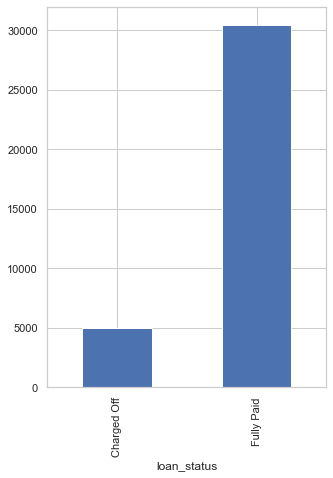

In [36]:
plt.figure(figsize=(5,7))
loan.groupby('loan_status').loan_amnt.count().plot.bar()
plt.show()

**As per plot Grade B and Grade A Category customers are much likely to apply for loans**

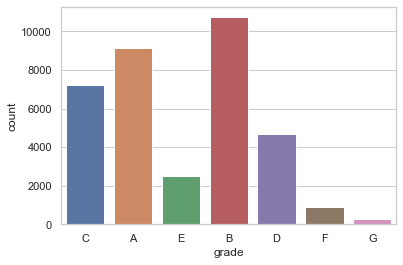

In [37]:
sns.countplot(x='grade', data=loan)
plt.show()

**Employee with 10+ experience apply for loan and less to default**

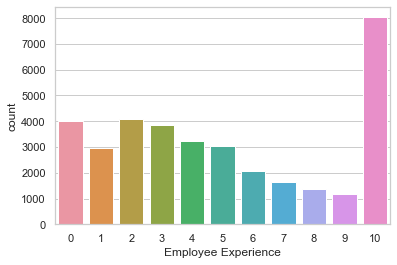

In [38]:
sns.countplot(x='emp_length', data=loan)
plt.xlabel('Employee Experience')
plt.show()

**Most term of loan fall in 36 Months of category and less risky**

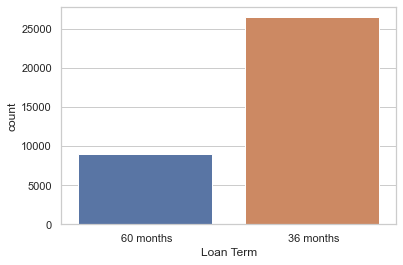

In [39]:
sns.countplot(x='term', data=loan)
plt.xlabel('Loan Term')
plt.show()

**Bivariate Analysis**

In [40]:
loan['issue_d']=pd.to_datetime(loan.issue_d, format='%b-%y')

In [41]:
loan['issue_d_month'] = loan['issue_d'].dt.month
loan['issue_d_year'] = loan['issue_d'].dt.year

**Loan amount is increasing wrt years - indicates positive market for loan to borrowers**

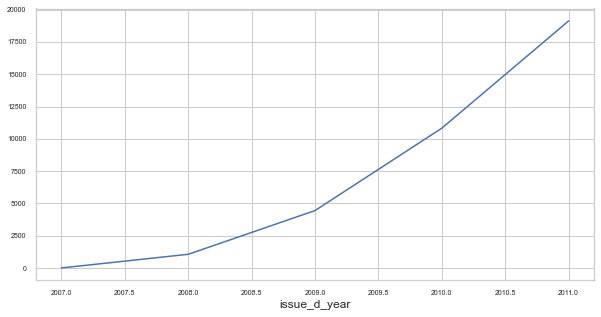

In [42]:
plt.figure(figsize=(10,5))
loan.groupby('issue_d_year').loan_amnt.count().plot(kind='line', fontsize=7)
plt.show()

In [43]:
loan['int_rate'].describe()
loan['int_rate']=loan['int_rate'].str.strip('%').astype('float')

**Intrest rate 20 above likely to default**

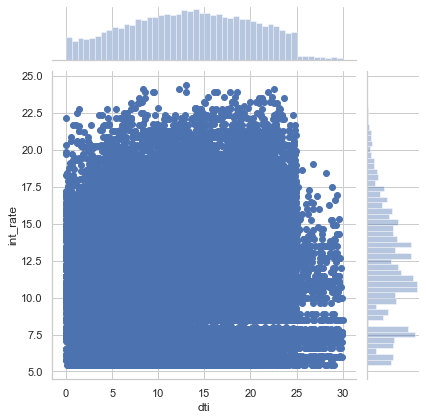

In [44]:
sns.jointplot('dti', 'int_rate', loan)

**More than 25000 Amount has chances of default as it has least population**

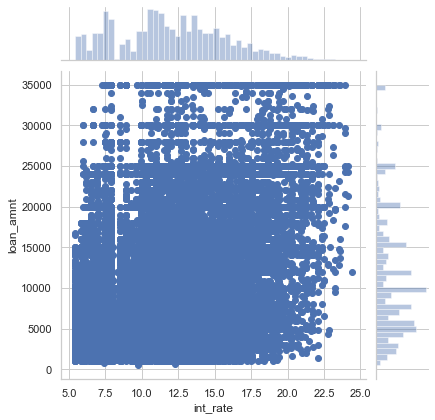

In [45]:
sns.jointplot('int_rate', 'loan_amnt', loan)